# Linear Regression
## Predicting Student's marks from Study Hours

### Import Libraries

In [ ]:
import autograd.numpy as np # for autograd, need to use autograd's numpy!
import matplotlib.pyplot as plt
from autograd import grad # autograd!
import jax.numpy as jaxnp
from jax import grad as jaxgrad

### Read Data

In [ ]:
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')

In [ ]:
data.shape

(100, 2)

### Seperate Data into X and Y

In [ ]:
X = data[:, 0]
Y = data[:, 1]

### Visualize the Data

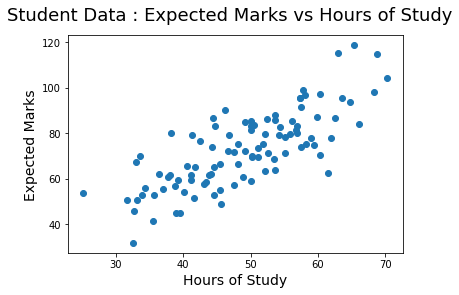

In [ ]:
fig = plt.figure()
plt.scatter(X, Y)
fig.suptitle('Student Data : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()

### Hyperparameters

In [ ]:
learning_rate = 0.0001
max_iteration = 40

### Parameters

In [ ]:
m = 0.0 # with autograd need to assign floats!
b = 0.0 

### Hypothesis

In [ ]:
def h (m, b, X) :
  return m * X + b

### Loss Function

In [ ]:
def loss (m, b, X, Y):
  return (1/np.size(Y))*np.sum(np.square(Y - h(m, b, X))) / 2

In [ ]:
def jaxloss (m, b, X, Y):
  return (1/jaxnp.size(Y))*jaxnp.sum(jaxnp.square(Y - h(m, b, X))) / 2

### Calculate Gradients

In [ ]:
# old gradient function that was manually derived from the loss function
# not used in the autograd version
def gradient (m, b, X, Y) :
  dm = - np.average((Y - h(m, b, X)) * X)
  db = - np.average(Y - h(m, b, X))
  return (dm, db)

In [ ]:
# autograd is used to derive the gradients
grad_loss_m = grad(loss,0) # grad of loss wrt 0th arg, m
grad_loss_b = grad(loss,1) # grad of loss wrt 1st arg, b

def gradientAG (m, b, X, Y) :
  dm = grad_loss_m(m,b,X,Y)
  db = grad_loss_b(m,b,X,Y)
  return (dm, db)



In [ ]:
# JAX autograd is used to derive the gradients
jaxgrad_loss_m = jaxgrad(jaxloss,0) # grad of loss wrt 0th arg, m
jaxgrad_loss_b = jaxgrad(jaxloss,1) # grad of loss wrt 1st arg, b

def jaxgradientAG (m, b, X, Y) :
  dm = jaxgrad_loss_m(m,b,X,Y)
  db = jaxgrad_loss_b(m,b,X,Y)
  return (dm, db)



### Gradient Descent

In [ ]:
def gradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    # replace the call to gradient with gradientAG for autograd
    dm, db = gradient (m, b, X, Y)
    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', loss(m, b, X, Y)) 
  return (m, b)

In [ ]:
def AGgradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    # replace the call to gradient with gradientAG for autograd
    dm, db = gradientAG (m, b, X, Y)
    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', loss(m, b, X, Y)) 
  return (m, b)

In [ ]:
def jaxgradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    # replace the call to gradient with gradientAG for autograd
    dm, db = jaxgradientAG (m, b, X, Y)
    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', jaxloss(m, b, X, Y)) 
  return (m, b)

### Train Model

In [ ]:
m1, b1 = gradient_descent (m, b, X, Y, learning_rate, max_iteration)
m2, b2 = AGgradient_descent (m, b, X, Y, learning_rate, max_iteration)
m3, b3 = jaxgradient_descent (m, b, X, Y, learning_rate, max_iteration)

iteration :  0  loss :  1593.1334591670338
iteration :  10  loss :  61.30482288585254
iteration :  20  loss :  56.34127863702311
iteration :  30  loss :  56.32510567688098
iteration :  0  loss :  1593.1334591670338
iteration :  10  loss :  61.30482288585254
iteration :  20  loss :  56.34127863702311
iteration :  30  loss :  56.32510567688098
iteration :  0  loss :  1593.1334
iteration :  10  loss :  61.30482
iteration :  20  loss :  56.341267
iteration :  30  loss :  56.325108


### Optimal values of Parameters using Trained Model

In [ ]:
print(m1,b1)
print(m2,b2)
print(m3,b3)

1.4788816395347437 0.03026923940654528
1.4788816395347437 0.030269239406545283
1.4788816 0.030269234


### Linear Regression using *polyfit*  function of **numpy**

In [ ]:
np_m, np_b = np.polyfit(X, Y, 1)

### Optimal values of Parameters using Numpy Linear Regression

In [ ]:
np_m, np_b

(1.3224310227553602, 7.991020982270394)

### Visualize the Data

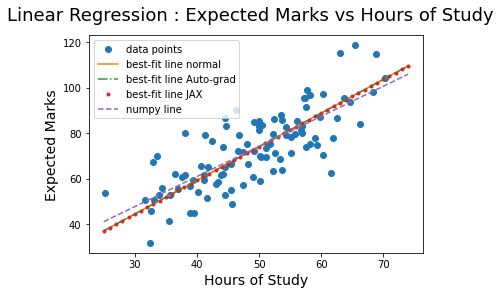

In [ ]:
fig = plt.figure()

# Generate data for plotting Line
x = np.arange(25, 75)
y1 = [m1 * x_i + b1 for x_i in x]
y2 = [m2 * x_i + b2 for x_i in x]
y3 = [m3 * x_i + b3 for x_i in x]

# Generate data for plotting Line Numpy Linear Regression
np_x = np.arange(25, 75)
np_y = [np_m * x_i + np_b for x_i in np_x]

# plot data and best-fit lines
plt.plot(X, Y, 'o', x, y1, '-',x, y2, '-.',x, y3, '.', np_x, np_y, '--')
plt.legend(loc='upper left', labels=['data points', 'best-fit line normal','best-fit line Auto-grad','best-fit line JAX' ,'numpy line'])

fig.suptitle('Linear Regression : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()